In [72]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import pandas as pd 
df = pd.read_csv('dataset_new_version.csv')

In [2]:
df.columns

Index(['DepartureDate', 'StationName', 'IndexNumber', 'Count', 'TicketsSold',
       'Capacity', 'CarClass', 'TrainNumber', 'Occupancy', 'OccupancyPercents',
       'WagonNumber', 'TrainRoute', 'NumberOfStations', 'IsBad',
       'IsPrediction', 'SuggestedCapacity', 'ExpectedWagonNuber',
       'SuggestedOccupancyPercents', 'ExpectedOccupancyPercents',
       'SuggestedOccupancy', 'SuggestedWagonNuber', 'ExpectedOccupancy',
       'ExpectedCapacity', 'IsValidation', 'ValidatedCount', 'PredictedCount'],
      dtype='object')

In [3]:
df['IsPrediction'].sum()

1599092

In [4]:
needed_trains = ['021Ц', '033Ц', '034Т', '003Ц', '009Т']

df_train = df.loc[(df.IsPrediction == 0)&(df.IsValidation==0)]
df_validation =  df.loc[(df.IsPrediction == 0)&(df.IsValidation==1)]
df_test =  df.loc[(df.IsPrediction == 1)&(df.IsValidation==0)]

In [5]:
df_train

,DepartureDate,StationName,IndexNumber,Count,TicketsSold,Capacity,CarClass,TrainNumber,Occupancy,OccupancyPercents,...,ExpectedWagonNuber,SuggestedOccupancyPercents,ExpectedOccupancyPercents,SuggestedOccupancy,SuggestedWagonNuber,ExpectedOccupancy,ExpectedCapacity,IsValidation,ValidatedCount,PredictedCount
0,2018-01-01,АЛМАТЫ 2,1.0,80.0,80.0,180.0,2Д,001Х,0.444444,44.444444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
1,2018-01-01,АЛМАТЫ 1,2.0,90.0,90.0,180.0,2Д,001Х,0.500000,50.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2,2018-01-01,ОТАР,3.0,90.0,90.0,180.0,2Д,001Х,0.500000,50.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3,2018-01-01,ШУ,4.0,88.0,90.0,180.0,2Д,001Х,0.488889,48.888889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
4,2018-01-01,ЛУГОВАЯ,5.0,86.0,90.0,180.0,2Д,001Х,0.477778,47.777778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222123,2020-08-04,ОП 205 КМ,11.0,0.0,1.0,54.0,3П,941Т,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2222124,2020-08-04,КОКТУМА,12.0,0.0,1.0,54.0,3П,941Т,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2222125,2020-08-04,РЗД N16,13.0,0.0,1.0,54.0,3П,941Т,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2222126,2020-08-04,ЖАЛАНАШК,14.0,0.0,1.0,54.0,3П,941Т,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [6]:
df_validation

,DepartureDate,StationName,IndexNumber,Count,TicketsSold,Capacity,CarClass,TrainNumber,Occupancy,OccupancyPercents,...,ExpectedWagonNuber,SuggestedOccupancyPercents,ExpectedOccupancyPercents,SuggestedOccupancy,SuggestedWagonNuber,ExpectedOccupancy,ExpectedCapacity,IsValidation,ValidatedCount,PredictedCount
3821220,2019-04-01,АЛМАТЫ 2,1.0,138.0,NaN,NaN,2Д,001Х,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,138.0,NaN
3821221,2019-04-01,АЛМАТЫ 1,2.0,145.0,NaN,NaN,2Д,001Х,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,145.0,NaN
3821222,2019-04-01,ОТАР,3.0,145.0,NaN,NaN,2Д,001Х,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,145.0,NaN
3821223,2019-04-01,ШУ,4.0,144.0,NaN,NaN,2Д,001Х,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,144.0,NaN
3821224,2019-04-01,ЛУГОВАЯ,5.0,145.0,NaN,NaN,2Д,001Х,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,145.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4611092,2020-02-29,ОП 205 КМ,11.0,4.0,NaN,NaN,3П,941Т,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4.0,NaN
4611093,2020-02-29,КОКТУМА,12.0,1.0,NaN,NaN,3П,941Т,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,NaN
4611094,2020-02-29,РЗД N16,13.0,1.0,NaN,NaN,3П,941Т,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.0,NaN
4611095,2020-02-29,ЖАЛАНАШК,14.0,3.0,NaN,NaN,3П,941Т,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,NaN


In [7]:
df_test

,DepartureDate,StationName,IndexNumber,Count,TicketsSold,Capacity,CarClass,TrainNumber,Occupancy,OccupancyPercents,...,ExpectedWagonNuber,SuggestedOccupancyPercents,ExpectedOccupancyPercents,SuggestedOccupancy,SuggestedWagonNuber,ExpectedOccupancy,ExpectedCapacity,IsValidation,ValidatedCount,PredictedCount
2222128,2020-03-02,АЛМАТЫ 2,1.0,150.0,NaN,NaN,2Д,001Х,NaN,NaN,...,17.0,83.333333,49.019608,0.833333,10.0,0.490196,306.0,0,NaN,150.0
2222129,2020-03-02,АЛМАТЫ 1,2.0,142.0,NaN,NaN,2Д,001Х,NaN,NaN,...,16.0,87.654321,49.305556,0.876543,9.0,0.493056,288.0,0,NaN,142.0
2222130,2020-03-02,ОТАР,3.0,146.0,NaN,NaN,2Д,001Х,NaN,NaN,...,17.0,90.123457,47.712418,0.901235,9.0,0.477124,306.0,0,NaN,146.0
2222131,2020-03-02,ШУ,4.0,144.0,NaN,NaN,2Д,001Х,NaN,NaN,...,16.0,88.888889,50.000000,0.888889,9.0,0.500000,288.0,0,NaN,144.0
2222132,2020-03-02,ЛУГОВАЯ,5.0,144.0,NaN,NaN,2Д,001Х,NaN,NaN,...,17.0,88.888889,47.058824,0.888889,9.0,0.470588,306.0,0,NaN,144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3821215,2021-12-30,ОП 205 КМ,11.0,9.0,NaN,NaN,3П,941Т,NaN,NaN,...,2.0,16.666667,8.333333,0.166667,1.0,0.083333,108.0,0,NaN,9.0
3821216,2021-12-30,КОКТУМА,12.0,10.0,NaN,NaN,3П,941Т,NaN,NaN,...,3.0,18.518519,6.172840,0.185185,1.0,0.061728,162.0,0,NaN,10.0
3821217,2021-12-30,РЗД N16,13.0,10.0,NaN,NaN,3П,941Т,NaN,NaN,...,3.0,18.518519,6.172840,0.185185,1.0,0.061728,162.0,0,NaN,10.0
3821218,2021-12-30,ЖАЛАНАШК,14.0,15.0,NaN,NaN,3П,941Т,NaN,NaN,...,3.0,27.777778,9.259259,0.277778,1.0,0.092593,162.0,0,NaN,15.0


In [8]:
df_train[df_train.IsBad == 1]

,DepartureDate,StationName,IndexNumber,Count,TicketsSold,Capacity,CarClass,TrainNumber,Occupancy,OccupancyPercents,...,ExpectedWagonNuber,SuggestedOccupancyPercents,ExpectedOccupancyPercents,SuggestedOccupancy,SuggestedWagonNuber,ExpectedOccupancy,ExpectedCapacity,IsValidation,ValidatedCount,PredictedCount
12663,2020-07-02,ШЫМКЕНТ,1.0,43.0,43.0,198.0,2Д,002Ь,0.217172,21.717172,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
12664,2020-07-02,МАНКЕНТ,2.0,45.0,45.0,216.0,2Д,002Ь,0.208333,20.833333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
12665,2020-07-02,ТЮЛЬКУБАС,3.0,48.0,48.0,252.0,2Д,002Ь,0.190476,19.047619,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
12666,2020-07-02,БОРАНДЫ,4.0,49.0,49.0,252.0,2Д,002Ь,0.194444,19.444444,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
12667,2020-07-02,ТАРАЗ,5.0,68.0,68.0,252.0,2Д,002Ь,0.269841,26.984127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222123,2020-08-04,ОП 205 КМ,11.0,0.0,1.0,54.0,3П,941Т,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2222124,2020-08-04,КОКТУМА,12.0,0.0,1.0,54.0,3П,941Т,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2222125,2020-08-04,РЗД N16,13.0,0.0,1.0,54.0,3П,941Т,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2222126,2020-08-04,ЖАЛАНАШК,14.0,0.0,1.0,54.0,3П,941Т,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


### Car classes

In [9]:
set(df_train.CarClass)

{'1Д', '1Л', '2Д', '2К', '2Л', '2С', '3О', '3П'}

In [10]:
X_columns = ['DepartureDate', 'StationName', 'IndexNumber', 'Count', 
       'CarClass', 'TrainNumber', 'WagonNumber', 'TrainRoute', 'NumberOfStations', 'IsBad'] #берем только нужные

In [11]:
from sklearn.model_selection import train_test_split
X = df_train[X_columns]
y = df_train['OccupancyPercents']

In [12]:
X_90, X_10, y_90, y_10 = train_test_split(X, y, test_size=0.1, random_state=42)

In [13]:
X_10

,DepartureDate,StationName,IndexNumber,Count,CarClass,TrainNumber,WagonNumber,TrainRoute,NumberOfStations,IsBad
2005381,2018-04-27,ЕРКЕНШИЛИК,3.0,0.0,3П,674Х,1.0,НУР-СУЛТАН 1 - ПАВЛОДАР,18.0,1
635216,2020-06-12,АРКА,20.0,0.0,3П,037Т,3.0,МАНГИСТАУ - НУР-СУЛТАН-НУРЛЫ ЖОЛ,20.0,1
1985764,2019-10-15,РЗД N12,14.0,74.0,3О,658Х,1.0,БЕЙНЕУ - МАНГИСТАУ,20.0,0
969761,2019-04-26,АК КУЛЬ,4.0,46.0,3П,056Ц,8.0,КОКШЕТАУ 1 - КЫЗЫЛОРДА,11.0,1
1300995,2018-09-19,ОП 142 КМ,46.0,8.0,3О,327Т,1.0,КАРАГАНДЫ ПАСС - КОСТАНАЙ,58.0,0
...,...,...,...,...,...,...,...,...,...,...
2184376,2020-06-29,РЗД 174 КМ,18.0,141.0,3П,692Х,3.0,АКТОБЕ-1 - АТЫРАУ,40.0,0
2165216,2019-01-27,РЗД 174 КМ,18.0,148.0,3П,692Х,4.0,АКТОБЕ-1 - АТЫРАУ,40.0,0
2091893,2020-07-25,ЖАНТЕРЕК,15.0,3.0,3П,691Х,1.0,АТЫРАУ - АКТОБЕ-1,40.0,0
362538,2018-07-22,АКСУ 2,3.0,83.0,2Д,031Т,13.0,ПАВЛОДАР - АЛМАТЫ 2,18.0,1


In [14]:
import seaborn as sns

In [15]:
X_10.isnull().sum()

DepartureDate       0
StationName         0
IndexNumber         0
Count               0
CarClass            0
TrainNumber         0
WagonNumber         0
TrainRoute          0
NumberOfStations    0
IsBad               0
dtype: int64

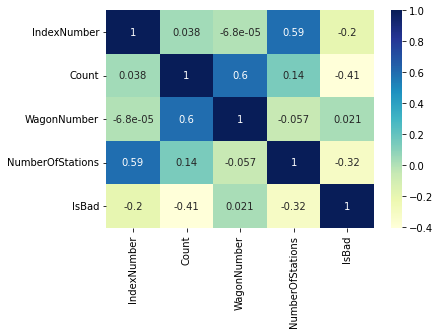

In [16]:
dataplot = sns.heatmap(X_10.corr(), cmap="YlGnBu", annot=True)

# Preprocessing

In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

def create_features(df, label=None):
    """
    Creates time series features from datetime index and scaling it
    Input is dataframe (3 features):Day (datetime64[ns]); value (float64); Address (object)
    Output is dataframe (15 features):
                        dayofweek (int64); quarter (int64); semester (int32); month (int64)
                        dayofyear (int64); dayofmonth (int64); weekofyear (int64); is_weekend (int32)
                        median_value_month (float64); mean_value_week (float64); month_sum (float64)
                        shifted30 (float64); shifted90  (float64); week_shifted30 (float64); week_shifted90 (float64)
    """
    df['Day'] = pd.to_datetime(df['DepartureDate'])
    
    df['year'] = df['Day'].dt.year
    df.loc[:, 'dayofweek'] = df['Day'].dt.dayofweek
    df.loc[:, 'dayofweek_name'] = df['Day'].dt.day_name()
    df.loc[:, 'is_weekend'] = np.where(df['dayofweek_name'].isin(['Sunday','Saturday']),1,0)
    df.loc[:, 'quarter'] = df['Day'].dt.quarter
    df.loc[:, 'semester'] = np.where(df['Day'].dt.quarter.isin([1,2]),1,2)
    df.loc[:, 'month'] = df['Day'].dt.month
    #df['year'] = df['Day'].dt.year
    df.loc[:, 'dayofyear'] = df['Day'].dt.dayofyear
    df.loc[:, 'dayofmonth'] = df['Day'].dt.day
    df.loc[:, 'weekofyear'] = df['Day'].dt.weekofyear

#     df.loc[:, "median_value_month"] = df[['month','value']].groupby(['month'],as_index=False)["value"].transform("median")
#     df.loc[:, "mean_value_week"] = df[['weekofyear','value']].groupby(['weekofyear'],as_index=False)["value"].transform("mean")
#     df.loc[:, "month_sum"] = df[['month','value']].groupby(['month'], as_index=False)["value"].transform("sum")

#     df.loc[:, 'shifted30'] = df['value'].shift(30)
#     df.loc[:, 'shifted30'].fillna(0, inplace=True)
#     df.loc[:, 'shifted90'] = df['value'].shift(90)
#     df.loc[:, 'shifted90'].fillna(0, inplace=True)

#     df.loc[:, "week_shifted30"] = df[['weekofyear', 'value']].groupby(['weekofyear'],as_index=False)["value"].transform(lambda x : x.shift(4).sum())
#     df.loc[:, "week_shifted90"] = df[['weekofyear', 'value']].groupby(['weekofyear'],as_index=False)["value"].transform(lambda x : x.shift(12).sum())

#     X = df[['dayofweek', 'quarter', 'semester', 'month',#'year',
#            'dayofyear', 'dayofmonth', 'weekofyear', 'is_weekend'
#             ]]

#     scaler = StandardScaler()
#     scaler.fit(X)
#     X_scl = scaler.transform(X)
#     X_scl_df = pd.DataFrame(X_scl, index=X.index, columns=X.columns)

#     if label:
#         y = df[label]
#         return X_scl_df, y
#     return X_scl_df
    return df


In [20]:
create_features(X_10)

C:\Users\User\AppData\Local\Temp/ipykernel_4048/2173191107.py:27: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df.loc[:, 'weekofyear'] = df['Day'].dt.weekofyear


,DepartureDate,StationName,IndexNumber,Count,CarClass,TrainNumber,WagonNumber,TrainRoute,NumberOfStations,IsBad,...,year,dayofweek,dayofweek_name,is_weekend,quarter,semester,month,dayofyear,dayofmonth,weekofyear
2005381,2018-04-27,ЕРКЕНШИЛИК,3.0,0.0,3П,674Х,1.0,НУР-СУЛТАН 1 - ПАВЛОДАР,18.0,1,...,2018,4,Friday,0,2,1,4,117,27,17
635216,2020-06-12,АРКА,20.0,0.0,3П,037Т,3.0,МАНГИСТАУ - НУР-СУЛТАН-НУРЛЫ ЖОЛ,20.0,1,...,2020,4,Friday,0,2,1,6,164,12,24
1985764,2019-10-15,РЗД N12,14.0,74.0,3О,658Х,1.0,БЕЙНЕУ - МАНГИСТАУ,20.0,0,...,2019,1,Tuesday,0,4,2,10,288,15,42
969761,2019-04-26,АК КУЛЬ,4.0,46.0,3П,056Ц,8.0,КОКШЕТАУ 1 - КЫЗЫЛОРДА,11.0,1,...,2019,4,Friday,0,2,1,4,116,26,17
1300995,2018-09-19,ОП 142 КМ,46.0,8.0,3О,327Т,1.0,КАРАГАНДЫ ПАСС - КОСТАНАЙ,58.0,0,...,2018,2,Wednesday,0,3,2,9,262,19,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184376,2020-06-29,РЗД 174 КМ,18.0,141.0,3П,692Х,3.0,АКТОБЕ-1 - АТЫРАУ,40.0,0,...,2020,0,Monday,0,2,1,6,181,29,27
2165216,2019-01-27,РЗД 174 КМ,18.0,148.0,3П,692Х,4.0,АКТОБЕ-1 - АТЫРАУ,40.0,0,...,2019,6,Sunday,1,1,1,1,27,27,4
2091893,2020-07-25,ЖАНТЕРЕК,15.0,3.0,3П,691Х,1.0,АТЫРАУ - АКТОБЕ-1,40.0,0,...,2020,5,Saturday,1,3,2,7,207,25,30
362538,2018-07-22,АКСУ 2,3.0,83.0,2Д,031Т,13.0,ПАВЛОДАР - АЛМАТЫ 2,18.0,1,...,2018,6,Sunday,1,3,2,7,203,22,29


In [21]:
X_10 = X_10.drop(columns=['DepartureDate','Day','dayofweek_name']) #Уберем не нужные колонки
X_10

,StationName,IndexNumber,Count,CarClass,TrainNumber,WagonNumber,TrainRoute,NumberOfStations,IsBad,year,dayofweek,is_weekend,quarter,semester,month,dayofyear,dayofmonth,weekofyear
2005381,ЕРКЕНШИЛИК,3.0,0.0,3П,674Х,1.0,НУР-СУЛТАН 1 - ПАВЛОДАР,18.0,1,2018,4,0,2,1,4,117,27,17
635216,АРКА,20.0,0.0,3П,037Т,3.0,МАНГИСТАУ - НУР-СУЛТАН-НУРЛЫ ЖОЛ,20.0,1,2020,4,0,2,1,6,164,12,24
1985764,РЗД N12,14.0,74.0,3О,658Х,1.0,БЕЙНЕУ - МАНГИСТАУ,20.0,0,2019,1,0,4,2,10,288,15,42
969761,АК КУЛЬ,4.0,46.0,3П,056Ц,8.0,КОКШЕТАУ 1 - КЫЗЫЛОРДА,11.0,1,2019,4,0,2,1,4,116,26,17
1300995,ОП 142 КМ,46.0,8.0,3О,327Т,1.0,КАРАГАНДЫ ПАСС - КОСТАНАЙ,58.0,0,2018,2,0,3,2,9,262,19,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184376,РЗД 174 КМ,18.0,141.0,3П,692Х,3.0,АКТОБЕ-1 - АТЫРАУ,40.0,0,2020,0,0,2,1,6,181,29,27
2165216,РЗД 174 КМ,18.0,148.0,3П,692Х,4.0,АКТОБЕ-1 - АТЫРАУ,40.0,0,2019,6,1,1,1,1,27,27,4
2091893,ЖАНТЕРЕК,15.0,3.0,3П,691Х,1.0,АТЫРАУ - АКТОБЕ-1,40.0,0,2020,5,1,3,2,7,207,25,30
362538,АКСУ 2,3.0,83.0,2Д,031Т,13.0,ПАВЛОДАР - АЛМАТЫ 2,18.0,1,2018,6,1,3,2,7,203,22,29


In [22]:
X_10.select_dtypes(exclude=['float64','int64']) #категориальные данные

,StationName,CarClass,TrainNumber,TrainRoute,is_weekend,semester
2005381,ЕРКЕНШИЛИК,3П,674Х,НУР-СУЛТАН 1 - ПАВЛОДАР,0,1
635216,АРКА,3П,037Т,МАНГИСТАУ - НУР-СУЛТАН-НУРЛЫ ЖОЛ,0,1
1985764,РЗД N12,3О,658Х,БЕЙНЕУ - МАНГИСТАУ,0,2
969761,АК КУЛЬ,3П,056Ц,КОКШЕТАУ 1 - КЫЗЫЛОРДА,0,1
1300995,ОП 142 КМ,3О,327Т,КАРАГАНДЫ ПАСС - КОСТАНАЙ,0,2
...,...,...,...,...,...,...
2184376,РЗД 174 КМ,3П,692Х,АКТОБЕ-1 - АТЫРАУ,0,1
2165216,РЗД 174 КМ,3П,692Х,АКТОБЕ-1 - АТЫРАУ,1,1
2091893,ЖАНТЕРЕК,3П,691Х,АТЫРАУ - АКТОБЕ-1,1,2
362538,АКСУ 2,2Д,031Т,ПАВЛОДАР - АЛМАТЫ 2,1,2


In [23]:
from sklearn.preprocessing import LabelEncoder
for col in X_10.select_dtypes(exclude=['float64','int64']).columns:
    X_10[col] = LabelEncoder().fit_transform(X_10[col]) #закодируем

In [24]:
X_10

,StationName,IndexNumber,Count,CarClass,TrainNumber,WagonNumber,TrainRoute,NumberOfStations,IsBad,year,dayofweek,is_weekend,quarter,semester,month,dayofyear,dayofmonth,weekofyear
2005381,95,3.0,0.0,7,55,1.0,36,18.0,1,2018,4,0,2,0,4,117,27,17
635216,41,20.0,0.0,7,19,3.0,35,20.0,1,2020,4,0,2,0,6,164,12,24
1985764,297,14.0,74.0,6,54,1.0,22,20.0,0,2019,1,0,4,1,10,288,15,42
969761,8,4.0,46.0,7,30,8.0,27,11.0,1,2019,4,0,2,0,4,116,26,17
1300995,242,46.0,8.0,6,40,1.0,26,58.0,0,2018,2,0,3,1,9,262,19,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2184376,282,18.0,141.0,7,57,3.0,1,40.0,0,2020,0,0,2,0,6,181,29,27
2165216,282,18.0,148.0,7,57,4.0,1,40.0,0,2019,6,1,1,0,1,27,27,4
2091893,112,15.0,3.0,7,56,1.0,18,40.0,0,2020,5,1,3,1,7,207,25,30
362538,14,3.0,83.0,2,15,13.0,48,18.0,1,2018,6,1,3,1,7,203,22,29


In [28]:
#сплит 70 на 30
X_train, X_test, y_train, y_test = train_test_split(X_10, y_10, test_size=0.3, random_state=42)

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rf = RandomForestRegressor().fit(X_train, y_train)

In [31]:
from sklearn.metrics import r2_score 
y_pred = rf.predict(X_test)
y_pred[y_pred>100]=100
y_pred[y_pred<0]=0

print('R2 score:', r2_score(y_pred,y_test))


R2 score: 0.9994775404954362


In [32]:
importances = rf.feature_importances_
columns = X_test.columns
pd.DataFrame({'attr':columns, 'val':importances}).sort_values(by=['val'], ascending=False)

,attr,val
8,IsBad,0.435700
2,Count,0.345131
3,CarClass,0.104273
5,WagonNumber,0.082913
4,TrainNumber,0.013448
9,year,0.009101
7,NumberOfStations,0.005114
6,TrainRoute,0.003301
15,dayofyear,0.000531
17,weekofyear,0.000251


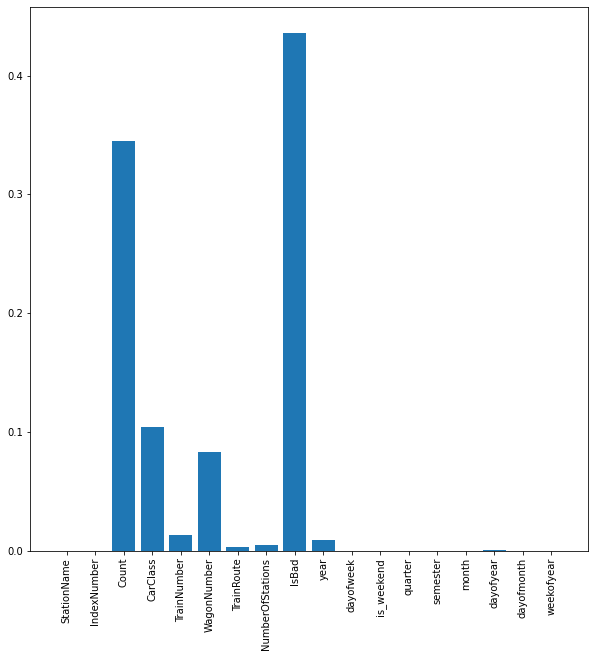

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.bar(x=columns, height=importances)
plt.xticks(rotation=90)
plt.show()

# Creation of pipeline

In [ ]:
# class SelectColumns:
#     X = None
#     def __init__(self):
#         pass
#     def fit(self, X, y=None):
#         self.X = X
#     def transform(self, X,y=None):
#         X_columns = ['DepartureDate', 'StationName', 'IndexNumber', 'Count', 
#        'CarClass', 'TrainNumber', 'WagonNumber', 'TrainRoute', 'NumberOfStations', 'IsBad']
#         return X[X_columns]

In [49]:
class DataTransformer:
    X = None
    def __init__(self):
        pass
    def fit(self, X, y=None):
        self.X = X
        return self
    def transform(self, X, y=None):
        X = create_features(X)
        X = X.drop(columns=['DepartureDate','Day','dayofweek_name'])
        return X

In [50]:
from sklearn.preprocessing import LabelEncoder
class LabelEncoderOpt:
    column_encoders: dict = {}
    X = None
    def __init__(self):
        pass
    def fit(self, X, y=None):
        self.X = X
        for col in X.select_dtypes(exclude=['float64','int64']).columns:
            enc = LabelEncoder().fit(X[col]) #закодируем
            self.column_encoders[col] = enc
        return self
    def transform(self, X, y=None):
        for col in X.select_dtypes(exclude=['float64','int64']).columns:
            X[col] = self.column_encoders[col].transform(X[col])
        return X

In [51]:
X_90, X_10, y_90, y_10 = train_test_split(X, y, test_size=0.1, random_state=42)

In [66]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([('dates', DataTransformer()), ('encoder', LabelEncoderOpt()), ('rf', RandomForestRegressor())])
pipe.fit(X_10, y_10)

C:\Users\User\AppData\Local\Temp/ipykernel_4048/2173191107.py:27: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df.loc[:, 'weekofyear'] = df['Day'].dt.weekofyear


Pipeline(steps=[('dates',
                 <__main__.DataTransformer object at 0x000001C4A568ADF0>),
                ('encoder',
                 <__main__.LabelEncoderOpt object at 0x000001C4A568A610>),
                ('rf', RandomForestRegressor())])

In [67]:
X_columns = ['DepartureDate', 'StationName', 'IndexNumber', 'Count', 
       'CarClass', 'TrainNumber', 'WagonNumber', 'TrainRoute', 'NumberOfStations', 'IsBad']
X_test = df_test[X_columns]
y_test = df_test['SuggestedOccupancyPercents']
X_test['WagonNumber'] = X_test['WagonNumber'].fillna(np.median(X_10['WagonNumber'])) #since it is null for some strange reason

C:\Users\User\AppData\Local\Temp/ipykernel_4048/2789533580.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['WagonNumber'] = X_test['WagonNumber'].fillna(np.median(X_10['WagonNumber'])) #since it is null for some strange reason


In [73]:
y_pred = pipe.predict(X_test)
y_pred[y_pred>100] = 100
y_pred[y_pred<0] = 0
print('R2 Score:', r2_score(y_pred,y_test))

R2 Score: 0.7203615034395037


In [79]:
df_test

,DepartureDate,StationName,IndexNumber,Count,TicketsSold,Capacity,CarClass,TrainNumber,Occupancy,OccupancyPercents,...,ExpectedWagonNuber,SuggestedOccupancyPercents,ExpectedOccupancyPercents,SuggestedOccupancy,SuggestedWagonNuber,ExpectedOccupancy,ExpectedCapacity,IsValidation,ValidatedCount,PredictedCount
2222128,2020-03-02,АЛМАТЫ 2,1.0,150.0,NaN,NaN,2Д,001Х,NaN,NaN,...,17.0,83.333333,49.019608,0.833333,10.0,0.490196,306.0,0,NaN,150.0
2222129,2020-03-02,АЛМАТЫ 1,2.0,142.0,NaN,NaN,2Д,001Х,NaN,NaN,...,16.0,87.654321,49.305556,0.876543,9.0,0.493056,288.0,0,NaN,142.0
2222130,2020-03-02,ОТАР,3.0,146.0,NaN,NaN,2Д,001Х,NaN,NaN,...,17.0,90.123457,47.712418,0.901235,9.0,0.477124,306.0,0,NaN,146.0
2222131,2020-03-02,ШУ,4.0,144.0,NaN,NaN,2Д,001Х,NaN,NaN,...,16.0,88.888889,50.000000,0.888889,9.0,0.500000,288.0,0,NaN,144.0
2222132,2020-03-02,ЛУГОВАЯ,5.0,144.0,NaN,NaN,2Д,001Х,NaN,NaN,...,17.0,88.888889,47.058824,0.888889,9.0,0.470588,306.0,0,NaN,144.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3821215,2021-12-30,ОП 205 КМ,11.0,9.0,NaN,NaN,3П,941Т,NaN,NaN,...,2.0,16.666667,8.333333,0.166667,1.0,0.083333,108.0,0,NaN,9.0
3821216,2021-12-30,КОКТУМА,12.0,10.0,NaN,NaN,3П,941Т,NaN,NaN,...,3.0,18.518519,6.172840,0.185185,1.0,0.061728,162.0,0,NaN,10.0
3821217,2021-12-30,РЗД N16,13.0,10.0,NaN,NaN,3П,941Т,NaN,NaN,...,3.0,18.518519,6.172840,0.185185,1.0,0.061728,162.0,0,NaN,10.0
3821218,2021-12-30,ЖАЛАНАШК,14.0,15.0,NaN,NaN,3П,941Т,NaN,NaN,...,3.0,27.777778,9.259259,0.277778,1.0,0.092593,162.0,0,NaN,15.0


In [103]:
X_valid = df_test.loc[(df_test['DepartureDate']>'2021-10-10')&(df_test['DepartureDate']<'2021-11-25')]

In [104]:
X_columns = ['DepartureDate', 'StationName', 'IndexNumber', 'Count', 
       'CarClass', 'TrainNumber', 'WagonNumber', 'TrainRoute', 'NumberOfStations', 'IsBad']
y_valid = X_valid['SuggestedOccupancyPercents']
X_valid = X_valid[X_columns]


In [105]:
X_valid['WagonNumber'] = X_valid['WagonNumber'].fillna(np.median(X_10['WagonNumber']))

In [106]:
X_valid

,DepartureDate,StationName,IndexNumber,Count,CarClass,TrainNumber,WagonNumber,TrainRoute,NumberOfStations,IsBad
2224774,2021-10-11,АЛМАТЫ 2,1.0,100.0,2Д,001Х,3.0,АЛМАТЫ 2 - ТАШКЕНТ ПАСС ЦЕНТР.,9.0,0
2224775,2021-10-11,АЛМАТЫ 1,2.0,128.0,2Д,001Х,3.0,АЛМАТЫ 2 - ТАШКЕНТ ПАСС ЦЕНТР.,9.0,0
2224776,2021-10-11,ОТАР,3.0,116.0,2Д,001Х,3.0,АЛМАТЫ 2 - ТАШКЕНТ ПАСС ЦЕНТР.,9.0,0
2224777,2021-10-11,ШУ,4.0,113.0,2Д,001Х,3.0,АЛМАТЫ 2 - ТАШКЕНТ ПАСС ЦЕНТР.,9.0,0
2224778,2021-10-11,ЛУГОВАЯ,5.0,116.0,2Д,001Х,3.0,АЛМАТЫ 2 - ТАШКЕНТ ПАСС ЦЕНТР.,9.0,0
...,...,...,...,...,...,...,...,...,...,...
3820945,2021-11-24,ОП 205 КМ,11.0,2.0,3П,941Т,3.0,АКТОГАЙ - ДОСТЫК,15.0,1
3820946,2021-11-24,КОКТУМА,12.0,5.0,3П,941Т,3.0,АКТОГАЙ - ДОСТЫК,15.0,1
3820947,2021-11-24,РЗД N16,13.0,5.0,3П,941Т,3.0,АКТОГАЙ - ДОСТЫК,15.0,1
3820948,2021-11-24,ЖАЛАНАШК,14.0,5.0,3П,941Т,3.0,АКТОГАЙ - ДОСТЫК,15.0,1


In [107]:
final_res = X_valid.copy()
final_res['OccupancyPercent'] = pipe.predict(X_valid)

In [108]:
final_res

,DepartureDate,StationName,IndexNumber,Count,CarClass,TrainNumber,WagonNumber,TrainRoute,NumberOfStations,IsBad,OccupancyPercent
2224774,2021-10-11,АЛМАТЫ 2,1.0,100.0,2Д,001Х,3.0,АЛМАТЫ 2 - ТАШКЕНТ ПАСС ЦЕНТР.,9.0,0,92.592593
2224775,2021-10-11,АЛМАТЫ 1,2.0,128.0,2Д,001Х,3.0,АЛМАТЫ 2 - ТАШКЕНТ ПАСС ЦЕНТР.,9.0,0,79.432099
2224776,2021-10-11,ОТАР,3.0,116.0,2Д,001Х,3.0,АЛМАТЫ 2 - ТАШКЕНТ ПАСС ЦЕНТР.,9.0,0,87.185185
2224777,2021-10-11,ШУ,4.0,113.0,2Д,001Х,3.0,АЛМАТЫ 2 - ТАШКЕНТ ПАСС ЦЕНТР.,9.0,0,99.962963
2224778,2021-10-11,ЛУГОВАЯ,5.0,116.0,2Д,001Х,3.0,АЛМАТЫ 2 - ТАШКЕНТ ПАСС ЦЕНТР.,9.0,0,87.185185
...,...,...,...,...,...,...,...,...,...,...,...
3820945,2021-11-24,ОП 205 КМ,11.0,2.0,3П,941Т,3.0,АКТОГАЙ - ДОСТЫК,15.0,1,1.234568
3820946,2021-11-24,КОКТУМА,12.0,5.0,3П,941Т,3.0,АКТОГАЙ - ДОСТЫК,15.0,1,3.086420
3820947,2021-11-24,РЗД N16,13.0,5.0,3П,941Т,3.0,АКТОГАЙ - ДОСТЫК,15.0,1,3.086420
3820948,2021-11-24,ЖАЛАНАШК,14.0,5.0,3П,941Т,3.0,АКТОГАЙ - ДОСТЫК,15.0,1,3.086420


In [109]:
final_res.to_csv('Predictions.csv')